# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = url + "&q=" + cities[i]
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | soledad
Processing Record 6 of Set 1 | solnechnyy
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | trairi
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | mwene-ditu
Processing Record 12 of Set 1 | bosaso
Processing Record 13 of Set 1 | pathein
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | zhangye
Processing Record 19 of Set 1 | raga
Processing Record 20 of Set 1 | penugonda
Processing Record 21 

Processing Record 38 of Set 4 | meulaboh
Processing Record 39 of Set 4 | laibin
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | barcelos
Processing Record 42 of Set 4 | ipora
Processing Record 43 of Set 4 | ust-koksa
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | vostok
Processing Record 46 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 47 of Set 4 | bonavista
Processing Record 48 of Set 4 | peniche
Processing Record 49 of Set 4 | kihei
Processing Record 0 of Set 5 | bograd
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | mongoumba
Processing Record 3 of Set 5 | matola
Processing Record 4 of Set 5 | besuki
Processing Record 5 of Set 5 | ngama
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | buariki
City not found. Skipping...
Processing Record 8 of Set 5 | nsanje
Processing Record 9 of Set 5 | ayagoz
Processing Record 10 of Set 5 | manzhouli
Processing Record 11 of Set

Processing Record 25 of Set 8 | berlevag
Processing Record 26 of Set 8 | saint-joseph
Processing Record 27 of Set 8 | kamenka
Processing Record 28 of Set 8 | nagato
Processing Record 29 of Set 8 | burien
Processing Record 30 of Set 8 | gusau
Processing Record 31 of Set 8 | myaundzha
Processing Record 32 of Set 8 | artigas
Processing Record 33 of Set 8 | kudahuvadhoo
Processing Record 34 of Set 8 | juneau
Processing Record 35 of Set 8 | haibowan
City not found. Skipping...
Processing Record 36 of Set 8 | bure
Processing Record 37 of Set 8 | lata
Processing Record 38 of Set 8 | devonport
Processing Record 39 of Set 8 | karpogory
Processing Record 40 of Set 8 | inta
Processing Record 41 of Set 8 | ajaccio
Processing Record 42 of Set 8 | nalut
Processing Record 43 of Set 8 | santa engracia
Processing Record 44 of Set 8 | cascais
Processing Record 45 of Set 8 | aksu
Processing Record 46 of Set 8 | vysokogornyy
Processing Record 47 of Set 8 | grand gaube
Processing Record 48 of Set 8 | jiang

Processing Record 15 of Set 12 | basoko
Processing Record 16 of Set 12 | carmelo
Processing Record 17 of Set 12 | mount hagen
Processing Record 18 of Set 12 | shelburne
Processing Record 19 of Set 12 | progreso
Processing Record 20 of Set 12 | broken hill
Processing Record 21 of Set 12 | dergachi
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | port augusta
Processing Record 24 of Set 12 | barrhead
Processing Record 25 of Set 12 | rudbar
Processing Record 26 of Set 12 | faya
Processing Record 27 of Set 12 | arinos
Processing Record 28 of Set 12 | laguna
Processing Record 29 of Set 12 | shingu
Processing Record 30 of Set 12 | pastavy
Processing Record 31 of Set 12 | karamay
City not found. Skipping...
Processing Record 32 of Set 12 | srandakan
Processing Record 33 of Set 12 | tambacounda
Processing Record 34 of Set 12 | andarab
City not found. Skipping...
Processing Record 35 of Set 12 | adrar
Processing Record 36 of Set 12 | pacasmayo
Processing Record 37 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,16.51,75,4,0.98,PT,1680843029
1,port elizabeth,-33.9180,25.5701,19.62,82,0,7.72,ZA,1680843030
2,albany,42.6001,-73.9662,9.40,53,87,0.89,US,1680842964
3,soledad,10.9184,-74.7646,26.07,78,0,7.72,CO,1680843031
4,solnechnyy,50.7214,136.6319,0.21,90,100,3.60,RU,1680843031


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,16.51,75,4,0.98,PT,1680843029
1,port elizabeth,-33.9180,25.5701,19.62,82,0,7.72,ZA,1680843030
2,albany,42.6001,-73.9662,9.40,53,87,0.89,US,1680842964
3,soledad,10.9184,-74.7646,26.07,78,0,7.72,CO,1680843031
4,solnechnyy,50.7214,136.6319,0.21,90,100,3.60,RU,1680843031


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

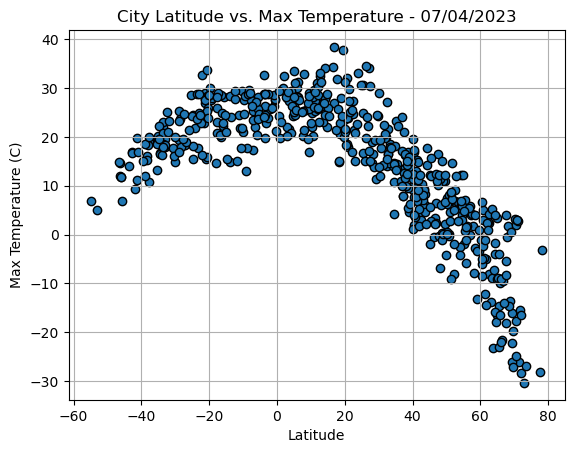

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature - 07/04/2023')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

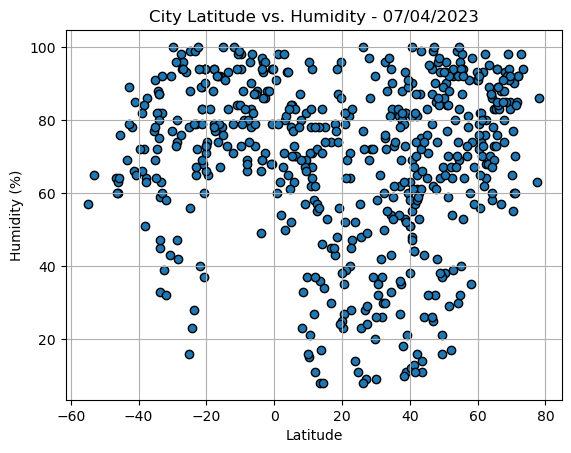

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity - 07/04/2023')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

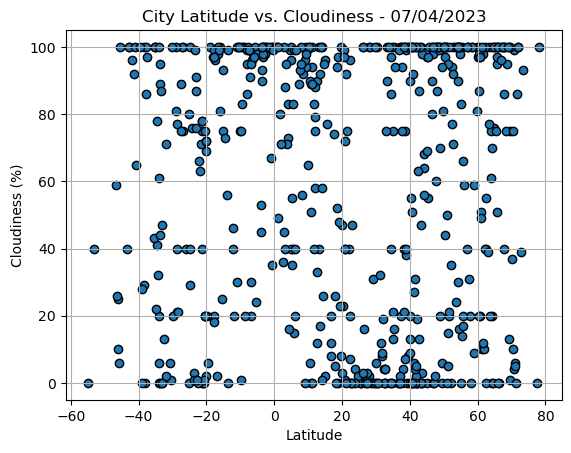

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness - 07/04/2023')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

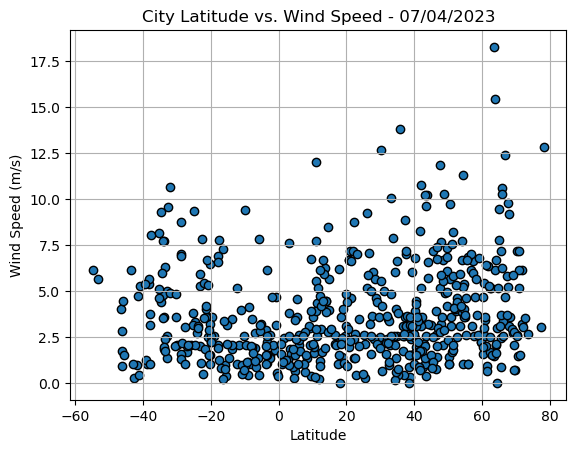

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed - 07/04/2023')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plotLR(x,y,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress = x*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
    
    plt.scatter(x,y)
    plt.plot(x,regress,"r-")
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=17,color="red")
    plt.ylabel(title)
    plt.xlabel('Latitude')
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,16.51,75,4,0.98,PT,1680843029
2,albany,42.6001,-73.9662,9.40,53,87,0.89,US,1680842964
3,soledad,10.9184,-74.7646,26.07,78,0,7.72,CO,1680843031
4,solnechnyy,50.7214,136.6319,0.21,90,100,3.60,RU,1680843031
6,chokurdakh,70.6333,147.9167,-17.65,90,99,1.47,RU,1680843033


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,19.62,82,0,7.72,ZA,1680843030
5,trairi,-3.2778,-39.2689,22.79,96,97,2.24,BR,1680843016
7,puerto ayora,-0.7393,-90.3518,26.42,94,100,3.16,EC,1680843033
8,mwene-ditu,-7.0000,23.4500,17.42,96,91,1.88,CD,1680843034
11,ushuaia,-54.8000,-68.3000,6.81,57,0,6.17,AR,1680842947


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.778524820226728


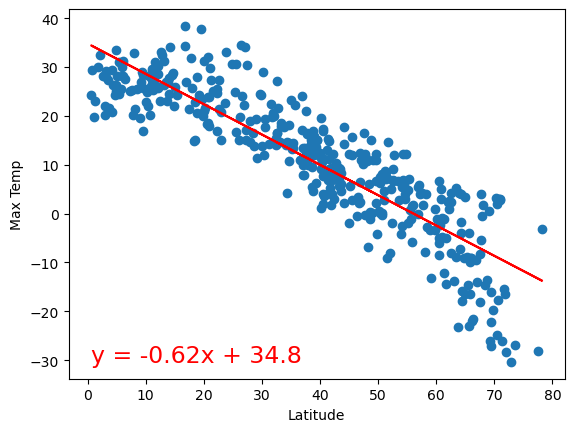

In [16]:
# Linear regression on Northern Hemisphere

x = northern_hemi_df.Lat
y = northern_hemi_df["Max Temp"]
plotLR(x,y,'Max Temp')

The r-value is: 0.4289965973013897


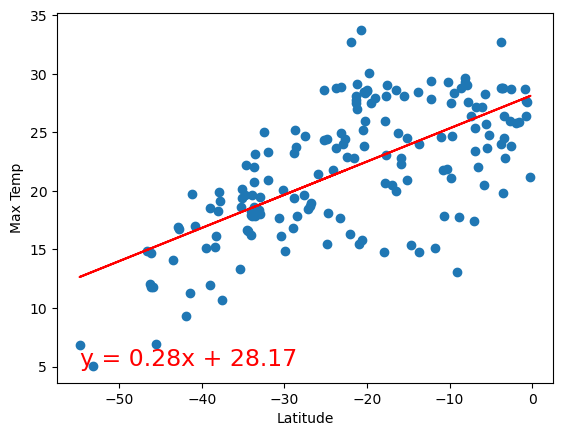

In [17]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df.Lat
y = southern_hemi_df["Max Temp"]
plotLR(x,y,'Max Temp')

**Discussion about the linear relationship:** What both plots have in commin with one another is that as it diverges away from the equator, the max temp decreases. For the Northern Hemisphere, there is a negative trend as the latitude increases. Whereas for the Southern Hemisphere regression plot, there is a trend where the max temp increases as the location becomes closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06930192989401357


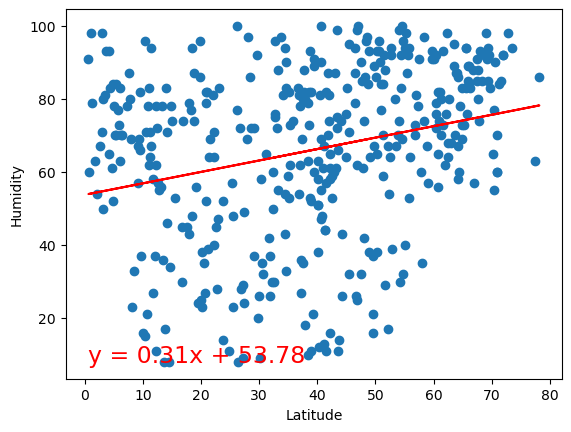

In [18]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df["Humidity"]
plotLR(x,y,'Humidity')

The r-value is: 0.10065073998606437


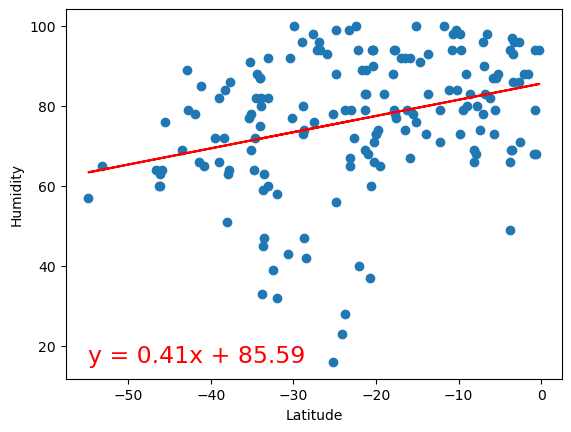

In [19]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df["Humidity"]
plotLR(x,y,'Humidity')

**Discussion about the linear relationship:** For both the northern and southern hemisphere linear regression graphs, both of them seem tio display a gradual increase in humidity as the latitude increases. From just making visual observations from the southern hemisphere linear regression, there does seem to be a trend within the plot itself. However on the northern hemisphere, the points seem to be more sporadic however the graph accounts accounts for all of the points. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004034100722733689


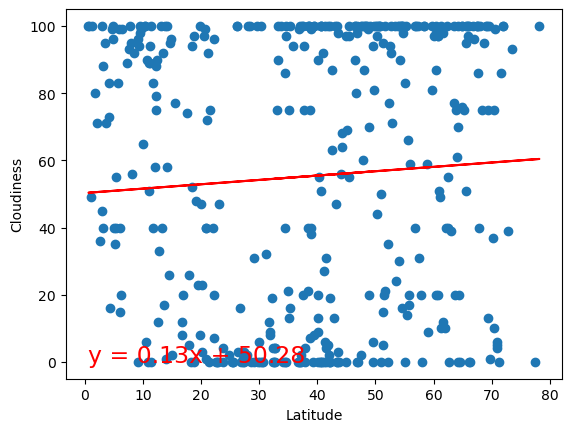

In [20]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df["Cloudiness"]
plotLR(x,y,'Cloudiness')

The r-value is: 0.08289790278089991


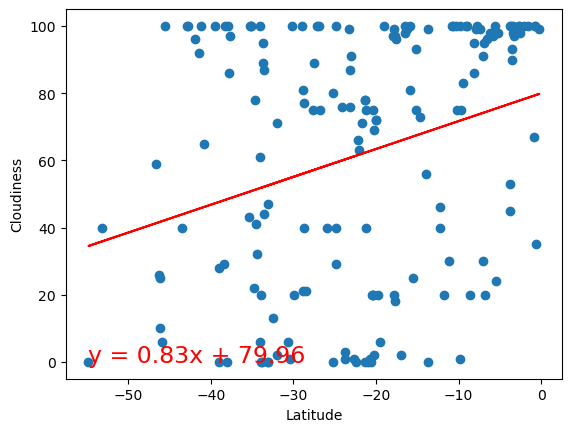

In [21]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df["Cloudiness"]
plotLR(x,y,'Cloudiness')

**Discussion about the linear relationship:** For both hemispheres, it seems like as the latitude increases, the cloudiness increases. Althought it is very steep in the northern hemisphere with a gradient value of 0.13. However for  the southern hemisphere, it is much more steep in terms of the change in cloudiness as the latitude changes from closer to the south pole all the way to the equator. There are a lot of cities with percentage of cloudiness at 0 or 100 regardsless of the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0470910724083975


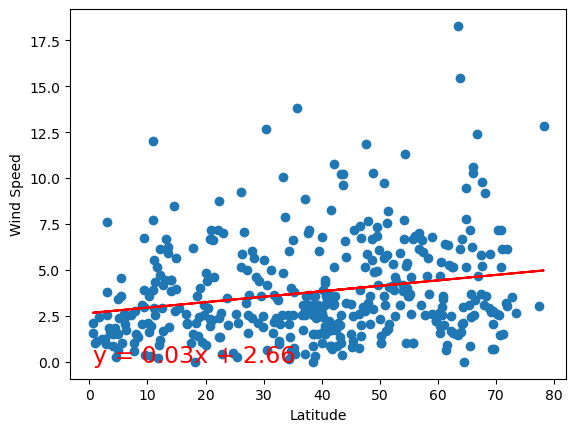

In [22]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df["Wind Speed"]
plotLR(x,y,'Wind Speed')

The r-value is: 0.08026802544611497


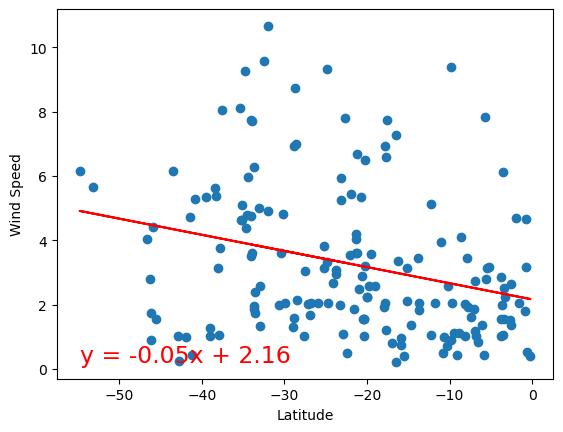

In [23]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df["Wind Speed"]
plotLR(x,y,'Wind Speed')

**Discussion about the linear relationship:** For both hemispheres, the wind speed decreases as the latitude becomes closer to the equator. In the case of the northern hemisphere, there is a positive trend and hence increased wind speed in general as the latitude pushes towards the north pole, the wind speec increases. For the south pole once again, there is a trend where wind speed increases as it moves away from the equator towards the south pole. 